# Research assignment 3

[Aaron Zhao]

[Confidence in Education and Immigration Plus Educational Attainment Status] 

[02/26/24]

## 1. Build your hypothesis

Write bullet points that answer the following questions:

    A. What is your depedent variable? For this assignment, your depedent should be a continuous variable. Describe how your depedent variable is measured. If your data doesn't allow this, you can use either the General Social Survey 2018 or the Grant and Loan Repayment data. 
    
    My dependent variable is confidence of respondents in education. 
    
    I understand that the variable "confidence level in education" is not a continuous variable: it is a categorical variable. I apologize for using this variable instead of a continuous variable, but based on Doctor Eaton's lectures as well as Anh's incredible lab session, I am under the impression that using a categorical data for this particular assignment is permissiable. 
    
    My dependent variable "coneduc" is measured by a scale of 3 (for which I have recoded to make more visual sense and eliminated all missing data), with 1 being having the least amount of confidence and 3 being having the most amount of confidence. 
    
    B. What are the indepedent variables you are most interested in? Are they interval ratio or nominal? Why?
    
    The independent variables that I am most interested in are the country of origins of respondents and the educational attainment of respondents. The country of origins of respondents (born) is a nominal variable whereas educational attainment of respondents (educ) are ordinal variables. This is because for the variable "born" the variable is placed in mutually exclusive categories (ex. United States, Other countries). As for the variable "educ", the variable is placed in a natural order with meaninful ranking (from low educational attainment to high educational attainment based on repondents), as such they are oridinal variables. 
    

    C. What are your control variables? Are they interval ratio or nominal? Why?
    
    My conrol variables are the sex of respondents, the year in which the respondents responded, and the age of respondents, and race. Based on the logic for question B, variable "sex" would be nominal, variable "year" would be interval, and variable "age" would be "interval". For variable "race" it is going to be nominal. 

    D. What are your hyphotheses on the relationships between your dependent and independent variables (including control variables)? Make seperate hypotheses for separate independent variables and for intervening relationships that involve multiple independent variables of interest.
    
    H1: I hypothesize that respondents' country of origin as outside of the United States (status of immigration) will have a positive correlation to their confidence level in education in the United States.
    
    H2: I hypothesize that respondents' country of origin as outside of the United States and higher educational attainment both will have a positive correlation to their confidence level in education in the United States.
    
    H3: I hypothesize that respondents' country of origin as outside of the United States and higher educational attainment both will have a positive correlation to their confidence level in education in the United States controlling for the sex of respondents, the year in which the respondents responded, and the age of respondents, and race.
    

## 2. Prepare your data

Do the following:

    A. Set current directory

    B. Set more off

    C. Creat log file
    
    D. Load only variable from the dataset that you will use

    E. Use -describe- and -codebook- to see details of the varaibles

In [1]:
cd "/Users/aaronzhao/Desktop/Desktop/Grad_Stats_II/soc211assignments"

/Users/aaronzhao/Desktop/Desktop/Grad_Stats_II/soc211assignments


In [2]:
set more off

(-set more- irrelevant in this version of Stata)


In [3]:
log using "Research Assignment 3.log", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/aaronzhao/Desktop/Desktop/Grad_Stats_II/soc211assignments/R
> esearch Assignment 3.log
  log type:  text
 opened on:  26 Feb 2024, 16:58:36


In [4]:
use id year born sex coneduc educ race age using "/Users/aaronzhao/Desktop/Desktop/GSS_stata 3/gss7222_r2.dta", clear

In [5]:
describe


Contains data from /Users/aaronzhao/Desktop/Desktop/GSS_stata 3/gss7222_r2.dta
 Observations:        72,390                  
    Variables:             8                  14 Nov 2023 22:19
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
year            int     %29.0g     COUNTMISS
                                              gss year for this respondent
id              int     %8.0g                 respondent id number
age             byte    %29.0g     AGE        age of respondent
educ            byte    %29.0g     EDUC       highest year of school completed
sex             byte    %29.0g     GENDER     respondents sex
race            byte    %29.0g     RACE       race of respondent
born            byte    %29.0g     YESNO      was r born in this country
coneduc         b

In [6]:
codebook year born sex coneduc educ race age


-------------------------------------------------------------------------------
year                                               gss year for this respondent
-------------------------------------------------------------------------------

                  Type: Numeric (int)
                 Label: COUNTMISS, but 34 nonmissing values are not labeled

                 Range: [1972,2022]                   Units: 1
         Unique values: 34                        Missing .: 0/72,390

              Examples: 1983  
                        1993  
                        2002  
                        2014  

-------------------------------------------------------------------------------
born                                                 was r born in this country
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: YESNO

                 Range: [1,2]                         Units: 1
         U

In [7]:
//I am chaning the variable so higher values = more confidence
gen coneducation=.
recode coneducation .=1 if coneduc==3
recode coneducation .=2 if coneduc==2 
recode coneducation .=3 if coneduc==1
label values coneducation confmt
label var coneducation "Confidence in Education"
tab coneduc coneducation, m

(72,390 missing values generated)
(7,314 changes made to coneducation)
(27,230 changes made to coneducation)
(13,856 changes made to coneducation)

        confidence in |           Confidence in Education
            education |         1          2          3          . |     Total
----------------------+--------------------------------------------+----------
         a great deal |         0          0     13,856          0 |    13,856 
            only some |         0     27,230          0          0 |    27,230 
           hardly any |     7,314          0          0          0 |     7,314 
           don't know |         0          0          0        555 |       555 
                  iap |         0          0          0     23,292 |    23,292 
            no answer |         0          0          0        122 |       122 
       skipped on web |         0          0          0         21 |        21 
----------------------+--------------------------------------------+--------

In [8]:
codebook coneducation


-------------------------------------------------------------------------------
coneducation                                            Confidence in Education
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: confmt, but label does not exist

                 Range: [1,3]                         Units: 1
         Unique values: 3                         Missing .: 23,990/72,390

            Tabulation: Freq.  Value
                        7,314  1
                       27,230  2
                       13,856  3
                       23,990  .


In [9]:
drop if coneducation==.

(23,990 observations deleted)


In [10]:
codebook coneducation


-------------------------------------------------------------------------------
coneducation                                            Confidence in Education
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: confmt, but label does not exist

                 Range: [1,3]                         Units: 1
         Unique values: 3                         Missing .: 0/48,400

            Tabulation: Freq.  Value
                        7,314  1
                       27,230  2
                       13,856  3


In [11]:
gen born1=.
recode born1 .=1 if born==1
recode born1 .=2 if born==2 
label var born1 "Country of Origin"
tab born1

(48,400 missing values generated)
(38,464 changes made to born1)
(3,916 changes made to born1)

 Country of |
     Origin |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |     38,464       90.76       90.76
          2 |      3,916        9.24      100.00
------------+-----------------------------------
      Total |     42,380      100.00


In [12]:
codebook born1


-------------------------------------------------------------------------------
born1                                                         Country of Origin
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 6,020/48,400

            Tabulation: Freq.  Value
                       38,464  1
                        3,916  2
                        6,020  .


In [13]:
drop if born1==.

(6,020 observations deleted)


In [14]:
codebook born1


-------------------------------------------------------------------------------
born1                                                         Country of Origin
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 0/42,380

            Tabulation: Freq.  Value
                       38,464  1
                        3,916  2


In [15]:
gen sex1=.
recode sex1 .=1 if sex==1
recode sex1 .=2 if sex==2
label var sex1 "Sex of respondents"
tab sex1

(42,380 missing values generated)
(18,625 changes made to sex1)
(23,722 changes made to sex1)

     Sex of |
respondents |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |     18,625       43.98       43.98
          2 |     23,722       56.02      100.00
------------+-----------------------------------
      Total |     42,347      100.00


In [16]:
codebook sex1


-------------------------------------------------------------------------------
sex1                                                         Sex of respondents
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 33/42,380

            Tabulation: Freq.  Value
                       18,625  1
                       23,722  2
                           33  .


In [17]:
drop if sex1==.

(33 observations deleted)


## 3. Use scatterplots to visually assess relationships between your dependent variable and all of your independent variables

    A. Quietly generate scatterplots for the dependent variable and each independent variable (including contol variables). Then use graph combine to examine all of the scatter plots.

    B. Write a paragraph interpreting what the scatterplots show

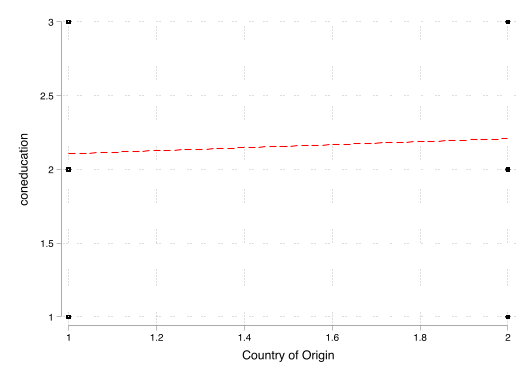

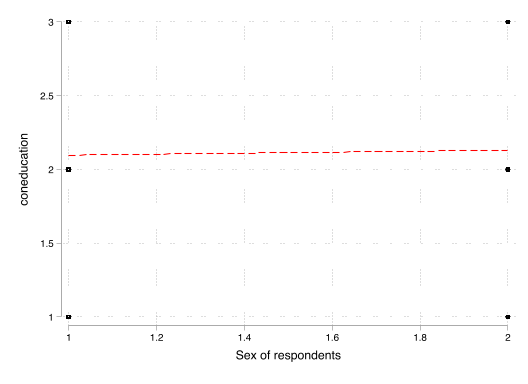

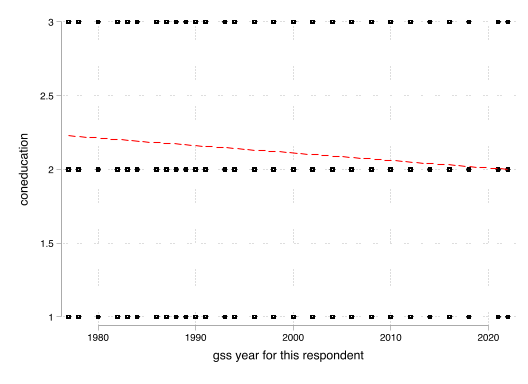

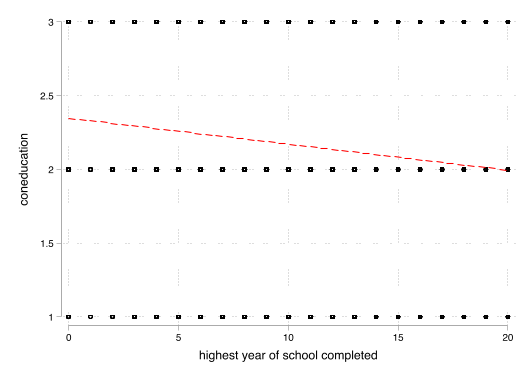

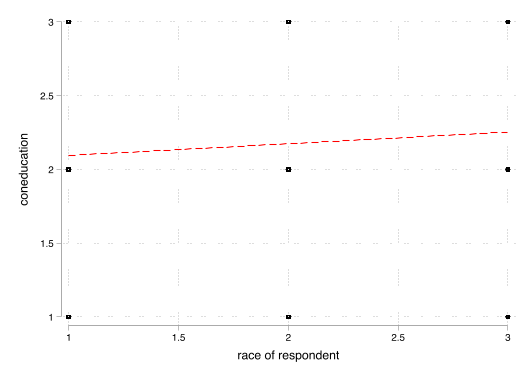

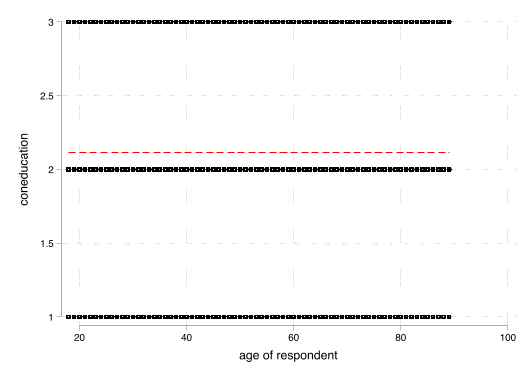

In [18]:
foreach x in born1 sex1 year educ race age {
quietly  graph twoway (scatter coneducation `x') (lfit coneducation `x', color(red)), ///
    name(`x', replace) legend(off) ytitle(coneducation) scheme(plotplainblind)
}

In [19]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


In [20]:
%set graph_height = 8

graph size was (11, 4in), is now (11, 8).


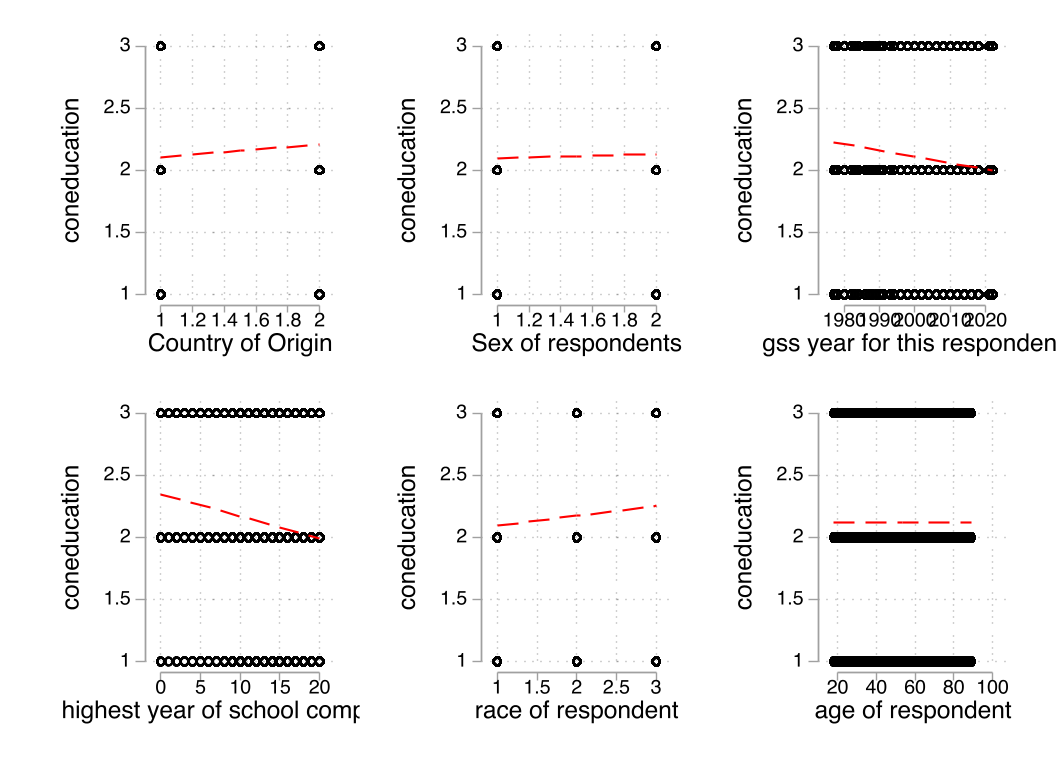

In [21]:
graph combine born1 sex1 year educ race age, col(3) scheme(plotplainblind) xsize(4)

## 4. Assess multicorrelation among your independent variables

    A. Create a correlation matrix for all of your variables.

    B. . Write bullet points or a short paragraph summarizing what the matrix shows.
    
    As indicated by the scatterplots, there is a weak positive correlation between the respondents' birth country of origin and their confidence in education. There is also a wek positive correlation between sex and race of the respondents to their confidence in education. There is a negative weak correlation between the year the gss is being conducted and respondents' confidence in education, a negative weak correlation between the respondents' educational attainment to respondents' confidence in education. There is a negligiable negative correlation between respondents' age and confidence in education, as it is especially cloase to being 0, which is also shown by the scatterplot.
    
    Regarding the relationships between independent variables, there is a moderate positive correlation between the respondents' birth country of origin and the race of respondents and a moderate positive correlation between the year the gss survy is conducted with the educational attainment of respondents. 

In [22]:
pwcorr coneducation born1 sex1 year educ race age


             | conedu~n    born1     sex1     year     educ     race      age
-------------+---------------------------------------------------------------
coneducation |   1.0000 
       born1 |   0.0458   1.0000 
        sex1 |   0.0257  -0.0059   1.0000 
        year |  -0.1125   0.0912  -0.0112   1.0000 
        educ |  -0.0856  -0.0265  -0.0348   0.2295   1.0000 
        race |   0.0700   0.2834   0.0212   0.1273  -0.0711   1.0000 
         age |  -0.0001  -0.0283   0.0276   0.1152  -0.1304  -0.1134   1.0000 


In [ ]:
## 5. Describe at least 2 OLS models to test your hypotheses

Write a paragraph or a set of bullet points that explain:

    A. Which model tests which of your hypotheses
    
    Model one will test my hypothesis one, Model two will test my hypothesis two, and Model three will test my hypothesis three.
    
    B. Which variables are included in each model
    
    All models have confidence in education as their dependent variable.

Model 1: Respondents' country of origin (birth)

Model 2: Respondents' country of origin (birth) and educational attainment (educ)

Model 3: Respondents' country of origin (birth) and educational attainment (educ) 
with the sex of respondents, the year in which the respondents responded, and the age of respondents, and race controlled for.
    
    B. How/why adding particular variables to subsequent models will test for spurious or intervening relationships

Model 1 tests my main hypothesis 1, where I am only concered with the relaitonship between respondent's country of origin and
their confidence level in education in the United States.

Model 2 includes the respondents' educational attainment as another factor of interest, where together with repondents' 
country of origin should have a strong positive association with their confidence level in education. Though including 
educational attainment may cause the correlation between respondents' country of origin and coneduc to become a bit lower
when considering them together, but it is important to note educational attainment because it is a factor that can have a 
great impact on coneduc of respondents and is thus equally important to study.

Model 3 also includes respondents' age, race, year for data collection, and sex in additional to what Model 2 is measuring. 
These variables are control variables because they are not the most interesting variables for me in this reserach. They are
there to help me determine if the findings I got from Model 1 and 2 is significant.


## 6. Write OLS regression equations for each model

Use subscripts to indicate which symbols represesent your different independent variables. To do so, you can copy and paste the LaTex code in this week's lesson notebook and edit the subscripts.


Model 1:
$\hat{Y} = \alpha + \beta_b \cdot x_b $

Model 2:
$\hat{Y} = \alpha + \beta_b \cdot x_b + \beta_e \cdot x_e $

Model 3:
$\hat{Y} = \alpha + \beta_b \cdot x_b + \beta_e \cdot x_e + \beta_a \cdot x_a + \beta_y \cdot x_y + \beta_s \cdot x_s + \beta_R \cdot x_R + \beta_r \cdot x_r $

$\hat{Y}$ is respondents' confidece level in education.

$\alpha$ is the intercept term.

$\cdot x_b$ is variable "born"

$\cdot x_e$ is variable "educ"

$\cdot x_a$ is variable "age"

$\cdot x_y$ is variable "year"

$\cdot x_s$ is variable "sex"

$\cdot x_R$ is variable "Black Respondents"

$\cdot x_r$ is variable "Other Race Respondents"


## 7. Estimate your models with stata

    A. Write Stata code to estimate the models and store the regression results
    
    B. Write code to output the estimates in a table within Jupyter Notebook and as an RTF file

In [23]:
est clear

*Model 1
quietly eststo: reg coneducation educ

*Model 2
quietly eststo: reg coneducation educ born

*Model 3
quietly eststo: reg coneducation educ born age sex year race

In [24]:
esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (educ "education" 2.race "black" 3.race "other race") noconstant


------------------------------------------------------------
                      (1)             (2)             (3)   
                  Model 1         Model 2         Model 3   
                     b/se            b/se            b/se   
------------------------------------------------------------
education          -0.018***       -0.017***       -0.010***
                  (0.001)         (0.001)         (0.001)   
born                                0.096***        0.075***
                                  (0.011)         (0.011)   
age                                                 0.001** 
                                                  (0.000)   
sex                                                 0.026***
                                                  (0.006)   
year                                               -0.005***
                                                  (0.000)   
race                                                0.083***
                       

In [25]:
quietly esttab using researchassignment3_tables.rtf, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (educ "education" 2.race "black" 3.race "other race") noconstant rtf replace

## 8. Summarize the results for your hypotheses

    A. Which of your hypotheses are supported and which are rejected by the (in)consistency of coefficients across all of your models?
    
    None of my hypotheses are really fully supported because the correlations between all variables are all weak correlations. The only moderate correlations we can find are in the relationships between the controls independent variables, where there is a moderate positive correlation between the respondents' birth country of origin and the race of respondents and a moderate positive correlation between the year the gss survy is conducted with the educational attainment of respondents. 
    Be that as it may, if we consider the weak correlations and interpret them, I would argue that my hypothesis one is supported: there is a weak positive correlation between respondents who are from another country and their confidence in education in the United States. My hypothesis two will be rejected because there is actually a weak negative correlation between respondents who have higher educational attainment and their confidence level in the educational system. Most of the controls have weak or negligible correlations, but there is a moderate positive correlation between the respondents' birth country of origin and the race of respondents and a moderate positive correlation between the year the gss survy is conducted with the educational attainment of respondents.
    
    B. Which of your hypotheses regarding intervening or spurious relationships are supported / rejected by similarities / differences in coefficients across all of your models?
    
    All of my models do not have a strong or moderate correlation. Based on the estimates in the table for question 7, it appears that non of my hypotheses regarding intervening or surious relatinships are supported (or rejected). The only moderatly correlation is between birth country and race of respondents, as well as the year in which the data got collected and educational attainment. I would argue that for birth country and race the relatinoship can be intervening whereas the time in which the data got collected and educational attainment have a spurious relationship for Model 3. This is because the relationship between the time the data got collected and educational attainment are associated but not causally related likely due to coincidence or another force. The correlation between birth country and race can be intervening because they may serve as an intervening variable that follow the independent variable (educ and born) but precedes coneduc dependent variable in this relationship. 

    C. What ideas do you have for why any of your hypotheses were rejected? Are there additional omitted variables do you think you should include to test your hypotheses that might change your results? Why?
    
    Some ideas why my hypotheses were rejected may include firstly the fact that the data I am using is categorical data with confidence level instead of a standard numeric data. But putting that aside, it is possible to argue that the reason why higher educational attainment leads to lower confidence level in education can point to the fact that I did not seperate out respondents who are from another country and got educated in the United States versu in their home country. Depending on the context of the country and its relationship with the United States, the confidence level may drop simply due to subjective educational expereinces. I believe this is one additional omitted variable that I believe I should include to test my hypothesis. This may change my result because then we can differentiate amonst the groups that we are examining because by differentiating the respondents into more articulate and precise groups, we can see which group has a higher confidence in education, taking into account where they have gotten their education from.
    

In [ ]:
log close